In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np




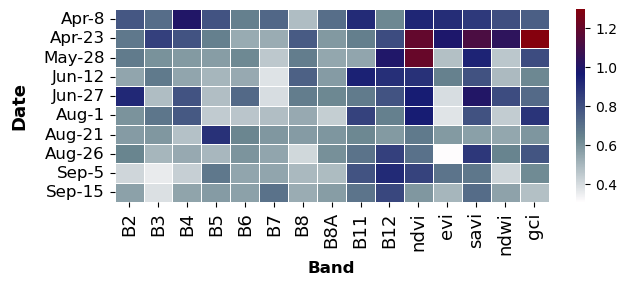

In [19]:
# Load the data from a CSV file
data_path = 'heatmap_feature_importance.csv'  # Change this to the path of your CSV file
data = pd.read_csv(data_path)

# Load the date change labels
label_path = 'change_label.csv'
date_labels = pd.read_csv(label_path)

# Merge the original data with the new date labels
data = data.merge(date_labels, on='Date id', how='left')

# Specify the order of the bands manually
band_order = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12','ndvi','evi','savi','ndwi','gci']  # Update this list to match your desired order

#Chose parameters-----------------------------------------------------------------------

# --------------------------------------------------------------------------------------
# Creating a pivot table for the heatmap, reordering columns by specified band order
pivot_table = data.pivot_table(index='Date id', columns='Band', values='Importance', aggfunc='mean')[band_order]

# Manually set the labels for the y-axis
# custom_labels = ['8-Apr', '23-Apr', '28-May', '12-Jun', '27-Jun', '1-Aug', '21-Aug', '26-Aug', '5-Sep', '15-Sep']
custom_labels = ['Apr-8', 'Apr-23', 'May-28', 'Jun-12', 'Jun-27', 'Aug-1', 'Aug-21', 'Aug-26', 'Sep-5', 'Sep-15']
pivot_table.index = custom_labels  # Setting the index to the custom labels


# Create a color map
colors = ["#fefcfd", "#69858f", "#151972", "#85010e"]  # Example colors: adjust to your choice
custom_colormap = LinearSegmentedColormap.from_list("custom_sequential", colors, N=256)

# Creating the heatmap
# plt.figure(figsize=(11, 4)) #ORIGINAL
plt.figure(figsize=(7, 2.5)) #FOR POSTER

# Get the current axis
ax = plt.gca()

# Define the rotation angle of axis labels
plt.xticks(rotation=90) 
plt.yticks(rotation=45)

heatmap = sns.heatmap(pivot_table, linewidth=.5, cmap=custom_colormap, fmt=".3f")
# plt.title('Heatmap of Feature Importance by Band and Date ID')
plt.xlabel('Band', fontsize = 12,fontweight='bold' )
plt.ylabel('Date', fontsize = 13, labelpad=11,fontweight='bold')

# Adjust font size of x and y tick labels
ax.tick_params(axis='x', labelsize=13)  # Sets x-axis tick label font size to 10
ax.tick_params(axis='y', labelsize=12)  # Sets y-axis tick label font size to 10
plt.show()